<a href="https://colab.research.google.com/github/maddytae/pytae_demos/blob/master/pytae_demos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytae

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.8 MB/s eta 0:00:00


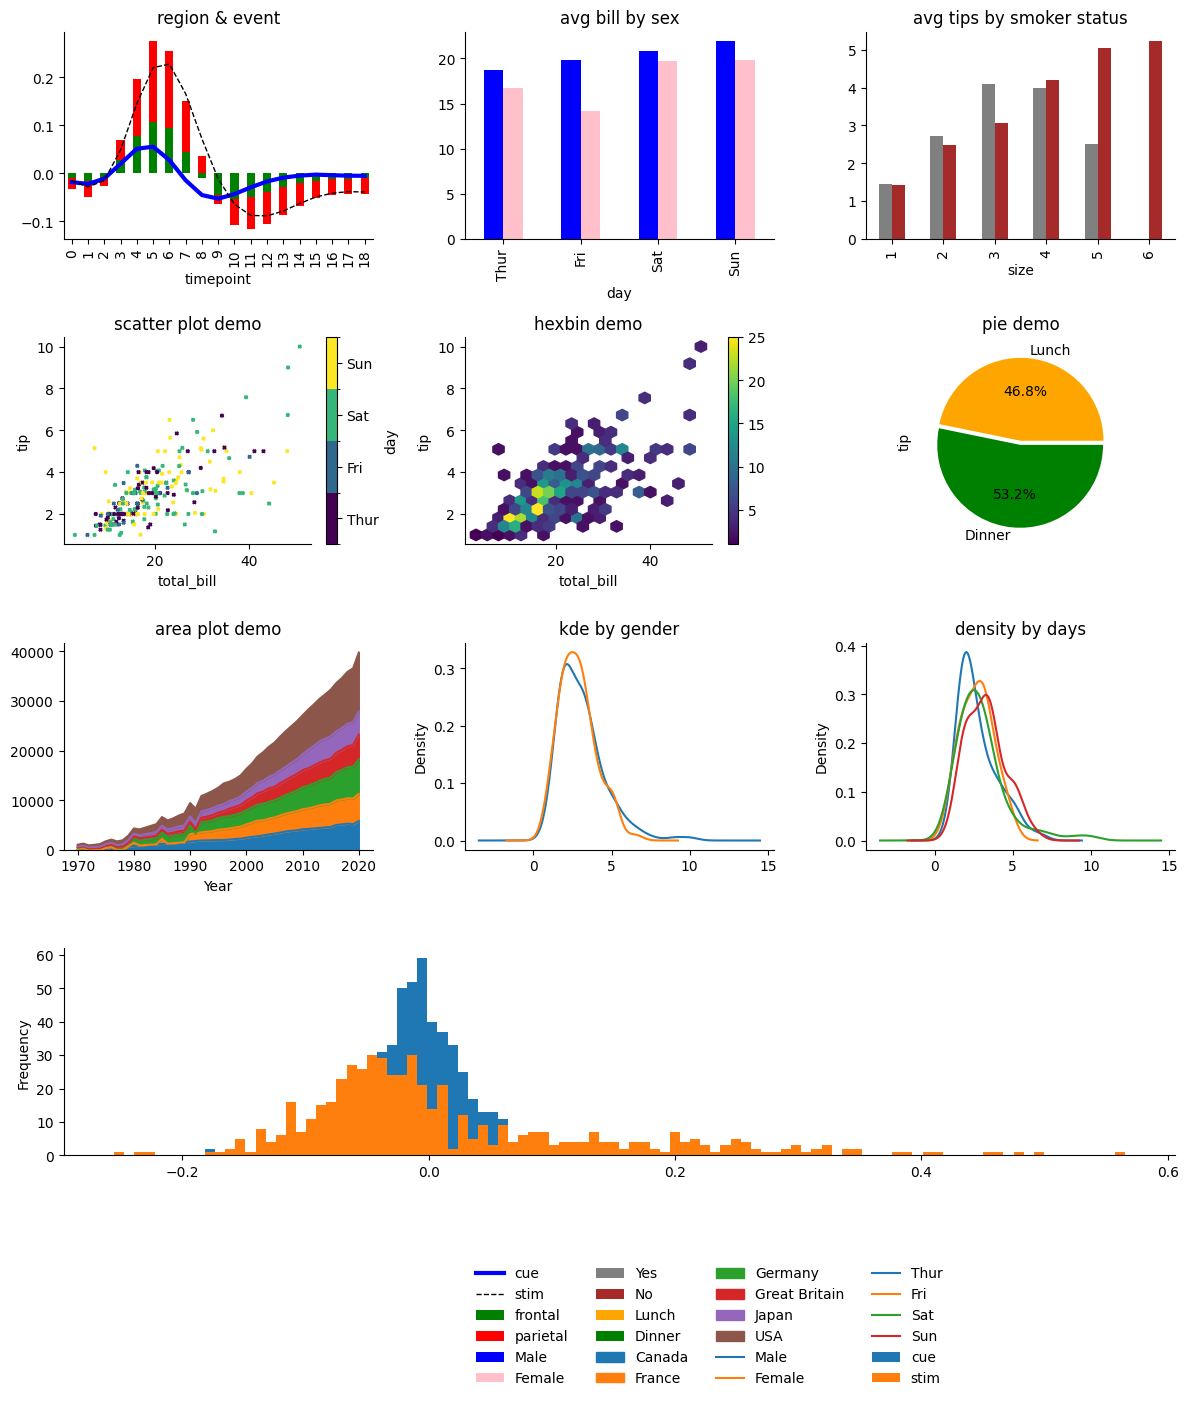

In [4]:
import numpy as np
import pandas as pd
import pytae as pt

fmri = pt.sample_data['fmri']
tips = pt.sample_data['tips']
healthexp = pt.sample_data['healthexp']



color={'cue': 'blue', 'stim': 'black', 'parietal': 'red',
       'frontal': 'green','Male':'blue','Female':'pink','Dinner':'green',
       'Lunch':'orange','Yes':'grey','No':'brown'}

style={'cue':'-','stim':'--'}
width={'cue':3,'stim':1}
marker = {'Male': 'o', 'Female': 'x'}
size={'Male': 10,'Female': 20}

mosaic = """
ABC
DEF
GHI
JJJ
"""
k = pt.Plotter(mosaic,figsize=(12, 12))

(k
.data(fmri)
.plot(x='timepoint', y='signal',by='event',aggfunc='mean',color=color,style=style,width=width,
      on='A',title='region & event',kind='line')
.plot(x='timepoint', y='signal',by='region',kind='bar',stacked=True,on='A',color=color,aggfunc='mean')
.data(tips)
.plot(x='day',y='total_bill',by='sex',aggfunc='mean',on='B',kind='bar',color=color,
      title='avg bill by sex')
.plot(x='size',y='tip',by='smoker',on='C',kind='bar',color=color,title='avg tips by smoker status')
.data(tips)
.plot(kind='scatter',x='total_bill',y='tip',on='D',marker='x',s=5,c='day',cmap='viridis',title='scatter plot demo')
.data(tips)
.plot(kind='hexbin',x='total_bill',y='tip',on='E',C='size',reduce_C_function=np.sum,cmap="viridis",gridsize=20,title='hexbin demo')
.data(tips)
.plot(kind='pie',y='tip',by='time',on='F',aggfunc='mean', autopct='%1.1f%%',colors=color,explode=(0,0.05),title='pie demo') #for pie matplotlib says colors and not color
.data(healthexp)
.plot(kind='area',x='Year',y='Spending_USD',aggfunc='mean',on='G', by="Country",title='area plot demo')
.data(tips)
.plot(kind='kde',column='tip',on='H', by="sex",title='kde by gender')
.plot(kind='density',on='I',by='day',column='tip',title='density by days' )
.data(fmri)
.plot(kind='hist',column='signal',by='event',on='J',bins=100)
.finalize(consolidate_legends=True,ncols=4)
)
k.fig